<a href="https://colab.research.google.com/github/jasim-1863/SDCProjects/blob/main/simpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Loaded 25000 training sequences and 25000 test sequences
Padding sequences...
x_train shape: (25000, 500)
x_test shape: (25000, 500)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 180ms/step - accuracy: 0.5055 - loss: 0.7143 - val_accuracy: 0.5388 - val_loss: 0.6889
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - accuracy: 0.5169 - loss: 0.6957 - val_accuracy: 0.5480 - val_loss: 0.6856
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.5326 - loss: 0.6881 - val_accuracy: 0.5516 - val_loss: 0.6752
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 180ms/step - accuracy: 0.5662 - loss: 0.6771 - val_accuracy: 0.5858 - val_loss: 0.6621
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 179ms/step - accuracy: 0.6249 - loss: 0.6449 - val_accuracy: 0.6040 - val_loss: 0.6440
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6049 - loss: 0.6459
Test score: 0.6454
Test accuracy: 0.6036


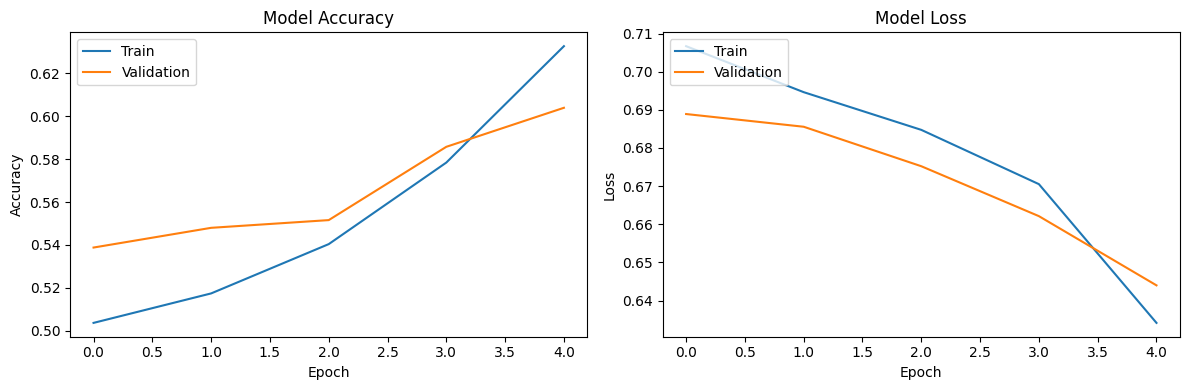

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step

Sample predictions:
Review 1:
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
First 50 words: please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he ...
True sentiment: negative
Predicted sentiment: negative
Confidence: 0.1556
--------------------------------------------------------------------------------
Review 2:
First 50 words: this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances the sandy dennis characte...
True sentiment: positive
Predicted sentiment: positive
Confidence: 0.6873
--------------------------------------------------------------------------------
Review 3:
First 50 words: at a time when motion picture animation of all sorts was in its br br the political of the russ

In [25]:
# Recurrent Neural Network (RNN) Implementation
# For Google Colab

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Set parameters
max_features = 10000  # Number of words to consider as features
max_length = 500      # Cut texts after this number of words
batch_size = 32
embedding_dims = 32   # Dimension of the embedding space

# Load the IMDB dataset
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(f"Loaded {len(x_train)} training sequences and {len(x_test)} test sequences")

# Pad sequences to ensure uniform input size
print("Padding sequences...")
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# Build the RNN model
model = Sequential([
    # Embedding layer to convert word indices into vectors
    Embedding(max_features, embedding_dims, input_length=max_length),

    # RNN layer with 128 units
    SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2),

    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
print("Training model...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test score: {score:.4f}")
print(f"Test accuracy: {acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Function to decode a review back to text
def decode_review(text):
    word_index = imdb.get_word_index()
    # Reverse word index to get words
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # Decode the review
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in text if i > 3])
    return decoded_review

# Make predictions on some test examples
predictions = model.predict(x_test[:5])
print("\nSample predictions:")
for i in range(5):
    true_sentiment = "positive" if y_test[i] == 1 else "negative"
    predicted_sentiment = "positive" if predictions[i][0] > 0.5 else "negative"
    print(f"Review {i+1}:")
    print(f"First 50 words: {decode_review(x_test[i])[:200]}...")
    print(f"True sentiment: {true_sentiment}")
    print(f"Predicted sentiment: {predicted_sentiment}")
    print(f"Confidence: {predictions[i][0]:.4f}")
    print("-" * 80)